# Artificial Neural Network Multilayer Perceptrion (ANN MLP)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv(
    'cleaned_smart_bin_data.csv'
)

# Save bin_id separately
bin_ids = df['bin_id']

# Drop bin_id and label from features
X = df.drop(['bin_id', 'priority_label'], axis=1)

# Update target variable y to directly use priority_label column
y = df['priority_label']

In [3]:
X_train, X_test, y_train, y_test, bin_id_train, bin_id_test = train_test_split(
    X, y, bin_ids,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [4]:
#feature scaling (important for ANN)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
mlp = MLPClassifier(
    hidden_layer_sizes=(16, 8),
    activation='relu',
    solver='adam',
    alpha=0.001,
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=(16, 8), max_iter=500,
              random_state=42)

In [6]:
from sklearn.metrics import accuracy_score

y_train_pred = mlp.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"ANN Train Accuracy: {train_accuracy:.4f}")
print(classification_report(y_train, y_train_pred))

ANN Train Accuracy: 0.9630
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       0.93      0.88      0.90        16
           2       1.00      0.96      0.98        25

    accuracy                           0.96        81
   macro avg       0.96      0.94      0.95        81
weighted avg       0.96      0.96      0.96        81



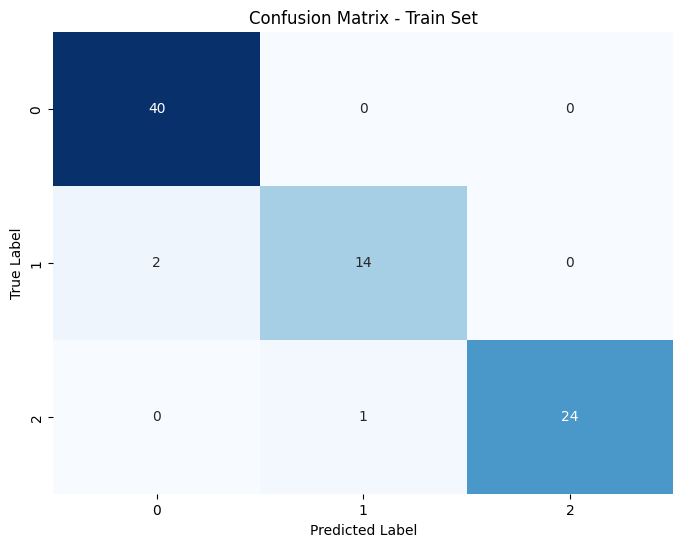

In [7]:
cm_train_3class = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_3class, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1', '2'],
            yticklabels=['0', '1', '2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Train Set')
plt.show()

In [8]:
#model evaluation
y_pred = mlp.predict(X_test_scaled)

print("ANN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


ANN Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92         7
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



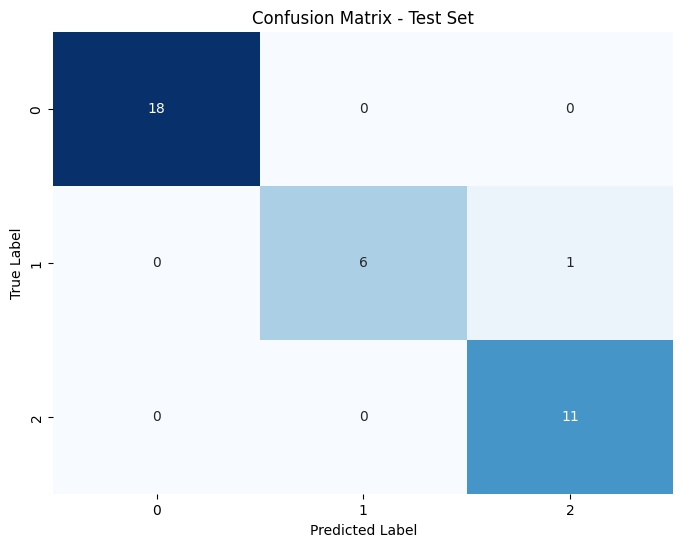

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1', '2'],
            yticklabels=['0', '1', '2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [10]:
# Probability of HIGH priority (class 1)
scores = mlp.predict_proba(X_test_scaled)[:, 1]


In [11]:
#print top 10 bins with highest priority
results = X_test.copy()
results['bin_id'] = bin_id_test.values
results['priority'] = y_pred
results['score'] = scores

top_10_ann = results.sort_values(
    by='score',
    ascending=False
).head(10)

print(top_10_ann[['bin_id', 'priority', 'score']])


     bin_id  priority     score
28  BIN-029         1  0.952263
26  BIN-027         1  0.932881
11  BIN-012         1  0.909135
70  BIN-123         1  0.864915
80  BIN-133         1  0.556588
67  BIN-120         1  0.532824
54  BIN-107         2  0.348740
93  BIN-146         2  0.300375
42  BIN-044         0  0.226451
57  BIN-110         2  0.202961
